In [1]:
#import rpy2.robjects as robjects

# You would extract and run the R code manually using rpy2
# For example, you can load R objects and data from R commands here

# Read the R Markdown file as plain text
with open("/Users/sherrywang/Downloads/IDS789/789.rmd", "r") as file:
    content = file.read()
    print(content)


---
title: "IDS 789"
output: html_document
date: "2024-11-11"
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)

install.packages("readxl")
library(readxl)

install.packages("dplyr")
library(dplyr)
```

## Data Setup

### FDIC Quarterly Banking Profile

```{r}
data <- read_excel("balance-sheet (3).xlsx")

# Remove the first 3 rows
data <- data[-c(1:3), ]

# Remove rows that are completely blank
data <- data[rowSums(is.na(data) | data == "") < ncol(data), ]
```

```{r}
# Extract the current variable names (first row) as a new column
time <- as.character(data[1, ])
time <- time[-1]

# Set the entries in the first column as the new variable names
row_names <- data[[1]]
row_names <- row_names[-c(1, length(row_names))]

# Remove the first row and the first column
data1 <- data[-1, -1]

# Transpose the data
data1 <- t(data1)  # Corrected to transpose the reduced data frame, data1
data1 <- data1[, -91]
data1 <- as.data.frame(data1, stringsAsFactors = FALSE)

# Define variabl

In [2]:

import pandas as pd

# Load the .dta file into a DataFrame
df = pd.read_stata("/Users/sherrywang/Downloads/IDS789/data2.dta")
import pandas as pd

# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display your DataFrame
df['deposits']



0       22917.257
1       23575.192
2       24308.965
3       24967.964
4       25673.746
5       26941.332
6       27141.405
7       27133.355
8       28651.198
9       29041.646
10      29089.391
11      28841.488
12      28715.469
13      30084.121
14      30114.432
15      30112.629
16      29670.701
17      30050.617
18      28929.456
19      27407.592
20      22463.251
21      22035.364
22      20782.366
23      18774.087
24      17379.316
25      17271.554
26      17116.974
27      16174.668
28      15608.863
29      14608.075
30      14221.318
31      13563.401
32      12346.514
33      12891.298
34      12849.570
35      12820.298
36      12835.764
37      13076.471
38      12820.749
39      13615.144
40      13540.975
41      14902.538
42      16234.489
43      17347.679
44      19601.736
45      20006.570
46      21032.702
47      21713.071
48      23586.351
49      29857.148
50      30391.749
51      31328.406
52      40035.438
53      42298.856
54      43752.527
55      45

In [3]:
df_train = df.iloc[:-20].copy()
df_test = df.drop(df_train.index).copy()


In [4]:
dep_train = df['deposits'].iloc[:-20].copy()
date_train = df['time'].iloc[:-20].copy()
#tv_test = df.drop(tv_train.index).copy()
dep_test = df.drop(dep_train.index).copy()
date_test = df.drop(date_train.index).copy()




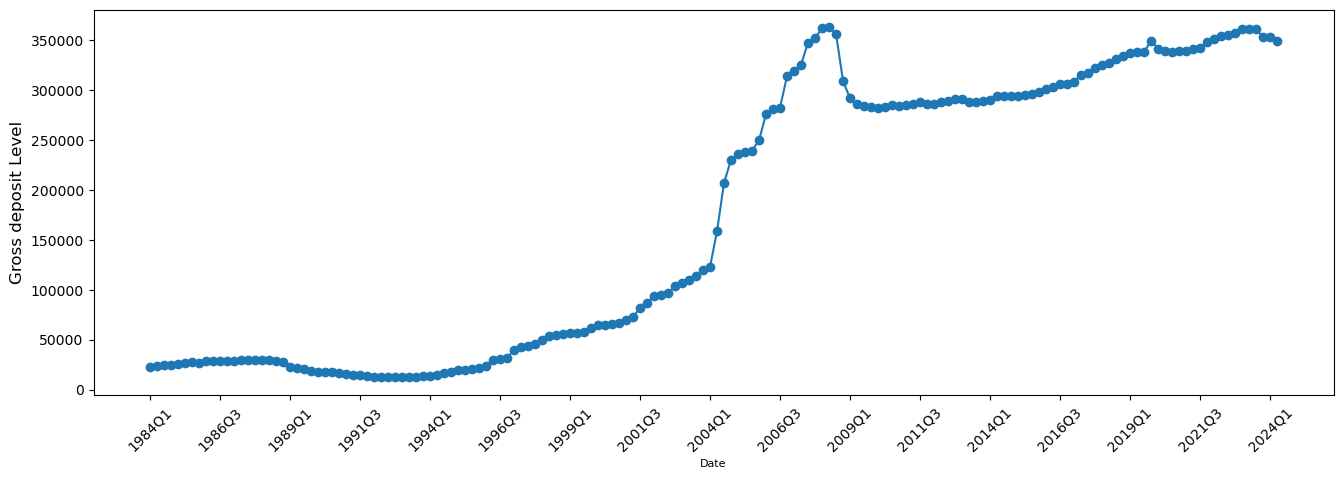

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


plt.figure(figsize=(16,5))

plt.plot(df.time,
            df.deposits,
            '-o')

plt.xticks(df.time[::10], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=8)
plt.ylabel("Gross deposit Level", fontsize=12)

plt.show()

In [6]:
"""def make_lag_plot(lag):
    x = dep_train.values[:-lag]
    y = dep_train.values[lag:]
    
    plt.figure(figsize=(5,5))
    
    plt.scatter(x, y, alpha=.7)
    plt.plot([0,100], [0,100], 'k--')
    
    plt.title("Lag = " + str(lag), fontsize=16)
    
    plt.show()
    
    return np.corrcoef(x,y)[0,1]

corr_coefs = []

for lag in range(1,25):
    corr_coefs.append(make_lag_plot(lag))



"""

'def make_lag_plot(lag):\n    x = dep_train.values[:-lag]\n    y = dep_train.values[lag:]\n    \n    plt.figure(figsize=(5,5))\n    \n    plt.scatter(x, y, alpha=.7)\n    plt.plot([0,100], [0,100], \'k--\')\n    \n    plt.title("Lag = " + str(lag), fontsize=16)\n    \n    plt.show()\n    \n    return np.corrcoef(x,y)[0,1]\n\ncorr_coefs = []\n\nfor lag in range(1,25):\n    corr_coefs.append(make_lag_plot(lag))\n\n\n\n'

In [7]:
import statsmodels.api as sm

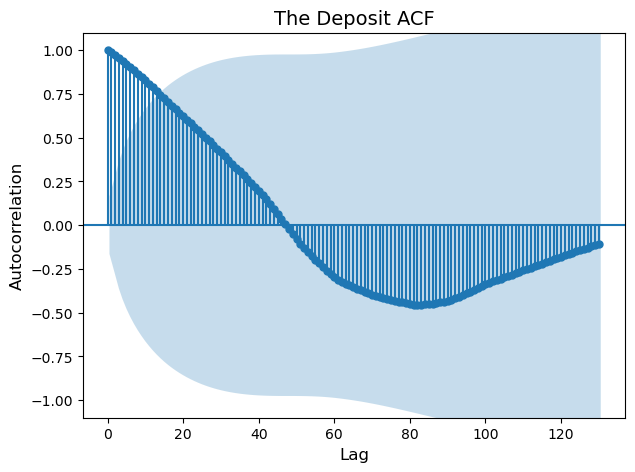

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

sm.graphics.tsa.plot_acf(dep_train.values,
                            lags = 130,
                            ax = ax)

plt.title('The Deposit ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

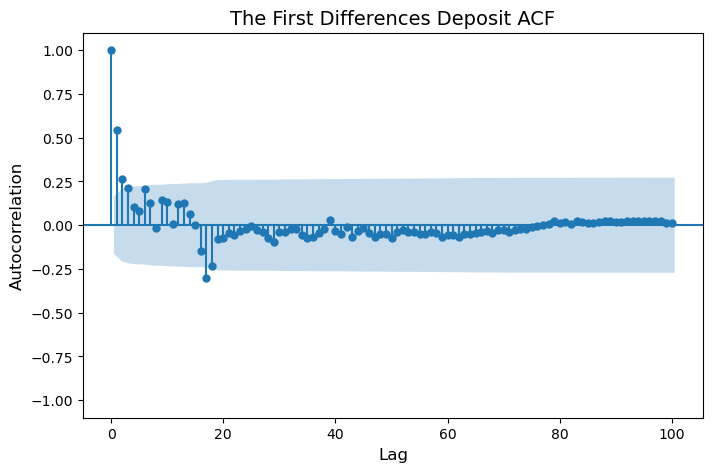

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

sm.graphics.tsa.plot_acf(dep_train.diff(1).values[1:],
                               lags=100,
                               ax=ax)

plt.title('The First Differences Deposit ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

#some changes

In [10]:
from statsmodels.tsa.api import ARIMA

In [11]:
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n-m):
        denom += np.abs(y_train[i+1:i+m+1] - y_train[i]*np.ones(m)).mean()
    denom = denom / (n-m)
    num = np.abs(y_test - y_preds).mean()
    return num/denom


In [12]:

!pip install pmdarima
from pmdarima import auto_arima

In [13]:
auto_arima(dep_train.values, trace=True, max_p=10, max_q=10,seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2903.758, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2943.955, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2900.200, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2904.795, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2952.219, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2901.935, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2901.752, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2903.182, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2900.926, Time=0.00 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.136 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [14]:
arima = auto_arima(dep_train.values, trace=True, seasonal=True, D = 1, m=1)
arima.summary()
sarima = ARIMA(dep_train.values,
                    order = (1,1,1),
                    seasonal_order = (2,1,0,36)).fit()
sarima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2903.758, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2943.955, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2900.200, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2904.795, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2952.219, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2901.935, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2901.752, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2903.182, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2900.926, Time=0.00 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.146 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  142
Model:             ARIMA(1, 1, 1)x(2, 1, [], 36)   Log Likelihood               -1095.391
Date:                           Fri, 15 Nov 2024   AIC                           2200.782
Time:                                   20:56:23   BIC                           2214.052
Sample:                                        0   HQIC                          2206.159
                                           - 142                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4601      0.269      1.709      0.087      -0.068       0.988
ma.L1          0.1409      0.282      0.499      0.618      -0.412       0.694
ar.S.L36      -0.9438      0.177     -5.340      0.000      -1.290      -0.597
ar.S.L72      -0.1661      0.259     -0.641      0.522      -0.674       0.342
sigma2      6.666e+07   9.25e-09   7.21e+15      0.000    6.67e+07    6.67e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               589.93
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.10
Prob(H) (two-sided):                  0.97   Kurtosis:                        14.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+31. Standard errors may be unstable.
"""

In [15]:
#arima = ARIMA(dep_train.values,order=(1, 1, 0), D = 1, m=5).fit()
arima = auto_arima(dep_train.values, trace=True, seasonal=True, D = 1, m=36)
arima.summary()
sarima = ARIMA(dep_train.values,
                    order = (1,1,1),
                    seasonal_order = (2,1,0,36)).fit()
sarima.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[36]             : AIC=2225.341, Time=4.76 sec
 ARIMA(0,1,0)(0,1,0)[36]             : AIC=2299.874, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[36]             : AIC=inf, Time=2.89 sec
 ARIMA(0,1,1)(0,1,1)[36]             : AIC=2233.451, Time=0.60 sec
 ARIMA(2,1,2)(0,1,1)[36]             : AIC=2232.282, Time=3.97 sec
 ARIMA(2,1,2)(1,1,0)[36]             : AIC=2223.868, Time=4.92 sec
 ARIMA(2,1,2)(0,1,0)[36]             : AIC=2268.098, Time=0.44 sec
 ARIMA(2,1,2)(2,1,0)[36]             : AIC=2225.363, Time=6.39 sec
 ARIMA(2,1,2)(2,1,1)[36]             : AIC=2227.330, Time=10.99 sec
 ARIMA(1,1,2)(1,1,0)[36]             : AIC=2205.374, Time=5.00 sec
 ARIMA(1,1,2)(0,1,0)[36]             : AIC=2266.446, Time=0.27 sec
 ARIMA(1,1,2)(2,1,0)[36]             : AIC=2223.438, Time=5.07 sec
 ARIMA(1,1,2)(1,1,1)[36]             : AIC=2223.416, Time=3.16 sec
 ARIMA(1,1,2)(0,1,1)[36]             : AIC=2230.422, Time=1.94 sec
 ARIMA(1,1,2)(2,1,1)[36

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  142
Model:             ARIMA(1, 1, 1)x(2, 1, [], 36)   Log Likelihood               -1095.391
Date:                           Fri, 15 Nov 2024   AIC                           2200.782
Time:                                   20:58:42   BIC                           2214.052
Sample:                                        0   HQIC                          2206.159
                                           - 142                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4601      0.269      1.709      0.087      -0.068       0.988
ma.L1          0.1409      0.282      0.499      0.618      -0.412       0.694
ar.S.L36      -0.9438      0.177     -5.340      0.000      -1.290      -0.597
ar.S.L72      -0.1661      0.259     -0.641      0.522      -0.674       0.342
sigma2      6.666e+07   9.25e-09   7.21e+15      0.000    6.67e+07    6.67e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               589.93
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.10
Prob(H) (two-sided):                  0.97   Kurtosis:                        14.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+31. Standard errors may be unstable.
"""

In [19]:
sarima = ARIMA(dep_train.values,
                    order = (2,0,1),
                    seasonal_order = (0,1,1,12)).fit()
sarima.summary()


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  142
Model:             ARIMA(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1348.919
Date:                          Fri, 15 Nov 2024   AIC                           2707.839
Time:                                  21:01:38   BIC                           2722.176
Sample:                                       0   HQIC                          2713.665
                                          - 142                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4424      0.264      5.473      0.000       0.926       1.959
ar.L2         -0.4424      0.264     -1.678      0.093      -0.959       0.074
ma.L1          0.1233      0.270      0.457      0.647      -0.405       0.652
ma.S.L12      -0.9700      0.058    -16.867      0.000      -1.083      -0.857
sigma2      5.199e+07   3.28e-09   1.58e+16      0.000     5.2e+07     5.2e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1171.19
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               3.30   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.28e+32. Standard errors may be unstable.
"""

In [20]:
#MASE analysis:

test_mase = mase(y_train = dep_train.values, y_test = dep_test.deposits.values, y_preds = sarima.forecast(len(date_test)))


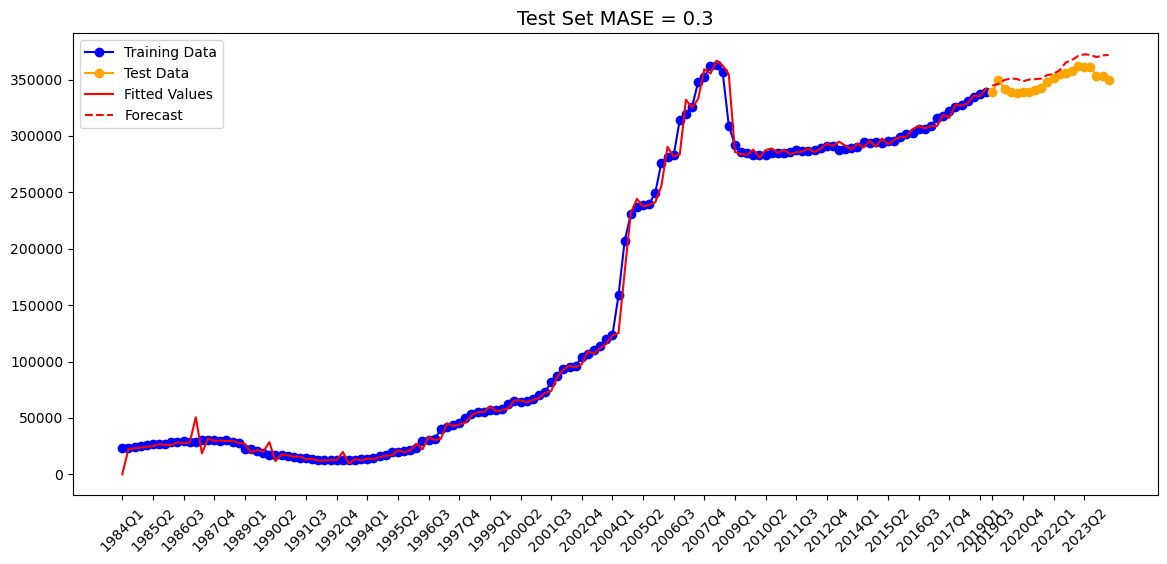

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.time,
         dep_test.deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(date_test.time,
         sarima.forecast(len(date_test)),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase,3)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.time[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()







In [22]:
rolling_avg_train_preds = dep_train.rolling(12).mean()
rolling_avg_test_preds = rolling_avg_train_preds.iloc[-1] * np.ones(len(dep_test))


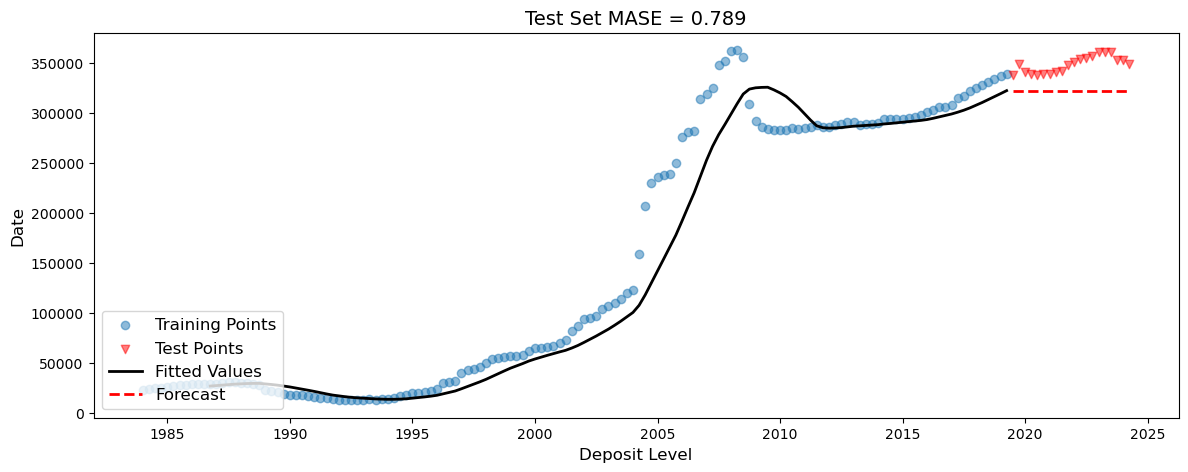

In [23]:
#baseline:
plt.figure(figsize=(14,5))
plt.scatter(df_train['date'],
              dep_train,
               alpha=.5,
               label="Training Points")

plt.scatter(date_test.date,
               dep_test.deposits,
               alpha=.5,
               c = 'red',
               marker = 'v',
               label="Test Points")

plt.plot(df_train['date'],
            rolling_avg_train_preds,
            'k-',
            linewidth = 2,
            label="Fitted Values")

plt.plot(date_test.date,
            rolling_avg_test_preds,
            'r--',
            linewidth=2,
            label="Forecast")

plt.legend(fontsize=12, loc=3)

test_mase_base = mase(y_train = dep_train, y_test = dep_test.deposits, y_preds = rolling_avg_test_preds)

plt.title("Test Set MASE = " + str(np.round(test_mase_base,3)),
             fontsize=14)

plt.xlabel("Deposit Level", fontsize=12)
plt.ylabel("Date", fontsize=12)






plt.show()

In [ ]:
#k fold cross validation
#grid search for best seasonality
